# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
tictactoe = pd.read_csv('tic-tac-toe.csv')
tictactoe.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [3]:
tictactoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [4]:
columns = tictactoe.columns[0:9]
target = tictactoe['class']
total_columns = tictactoe.columns

In [5]:
cat_to_num = pd.get_dummies(tictactoe[columns])

In [6]:
cat_to_num.head()

,TL_b,TL_o,TL_x,TM_b,TM_o,TM_x,TR_b,TR_o,TR_x,ML_b,...,MR_x,BL_b,BL_o,BL_x,BM_b,BM_o,BM_x,BR_b,BR_o,BR_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [7]:
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cat_to_num, target)

In [9]:
print(X_train.shape)
print(y_train.shape)

(718, 27)
(718,)


In [10]:
print(X_test.shape)
print(y_test.shape)

(240, 27)
(240,)


In [11]:
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Flatten())

In [13]:
model.add(tf.keras.layers.Dense(128, activation="relu"))

In [14]:
model.add(tf.keras.layers.Dense(128, activation="relu"))

In [15]:
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
trainer = model.fit(X_train,
                    y_train,
                    epochs=8,
                    batch_size=64,
                   validation_data=(X_test, y_test))

Epoch 1/8
12/12 [==============================] - 0s 15ms/step - loss: 0.6358 - accuracy: 0.6393 - val_loss: 0.5773 - val_accuracy: 0.7208
Epoch 2/8
12/12 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7396 - val_loss: 0.5247 - val_accuracy: 0.7625
Epoch 3/8
12/12 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7396 - val_loss: 0.4899 - val_accuracy: 0.7708
Epoch 4/8
12/12 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7744 - val_loss: 0.4571 - val_accuracy: 0.7750
Epoch 5/8
12/12 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.7925 - val_loss: 0.4375 - val_accuracy: 0.7750
Epoch 6/8
12/12 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8273 - val_loss: 0.3941 - val_accuracy: 0.8250
Epoch 7/8
12/12 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8482 - val_loss: 0.3904 - val_accuracy: 0.8208
Epoch 8/8
12/12 [=========

In [89]:
model.save('tic-tac-toe.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tic-tac-toe.model/assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [18]:
model_developed = tf.keras.models.load_model('tic-tac-toe.model')

In [19]:
pred_rows = model_developed.predict(X_test[25:50])

In [20]:
np.argmax(pred_rows, axis=1)

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [21]:
y_test[25:50]

887    False
891    False
579     True
656    False
777    False
581     True
835    False
405     True
217     True
780    False
376     True
10      True
391     True
655    False
124     True
72      True
826    False
851    False
713    False
927    False
933    False
428     True
899    False
458     True
683    False
Name: class, dtype: bool

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_training(history, metrics: list = ('loss',), figsize: tuple = (12, 5)):
    #plots training selected metrics for every batch
    epochs = range(1, len(history.history[metrics[0]]) + 1)
    fig, ax_arr = plt.subplots(1, len(metrics), figsize=figsize)
    if not isinstance(ax_arr, np.ndarray):
        ax_arr = np.array(ax_arr).reshape(1, )
    for i, metric in enumerate(metrics):
        ax_arr[i].plot(epochs, history.history[metric], color='g', linestyle='solid', label=metric, linewidth=2)
        ax_arr[i].plot(epochs, history.history[f"{metric}"], color='r', linestyle='dotted', 
                       label=f'validation {metric}')
        ax_arr[i].set_ylabel(metric)
        ax_arr[i].set_xlabel('epochs')
        ax_arr[i].grid()
        ax_arr[i].legend()
    plt.show()

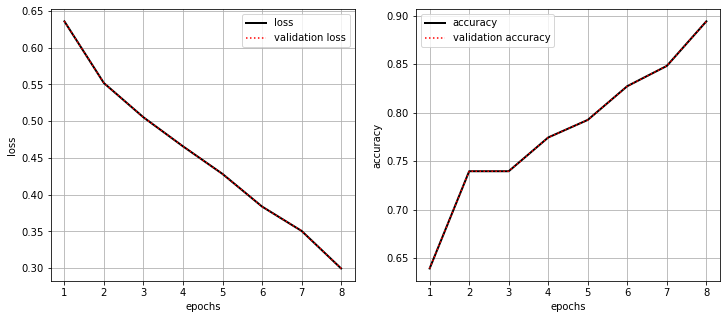

In [30]:
plot_training(trainer, metrics = ['loss', 'accuracy'])

**Which approach(es) did you find helpful to improve your model performance?**

In [32]:
'''Adjust the number of epochs to improve the model. More epochs will reduce the loss and increase the accuracy'''

'Adjust the number of epochs to improve the model. More epochs will reduce the loss and increase the accuracy'